<a href="https://colab.research.google.com/github/yifeiz-bu/Undergrad-researches/blob/main/IPCC_WOA23_ST_annual_mean_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netCDF4

In [ ]:
from netCDF4 import Dataset as NetCDFFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nc = NetCDFFile('woa23_decav.nc')

In [ ]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.6
    title: World Ocean Atlas 2023 : sea_water_temperature Annual 1991-2020 1.00 degree
    summary: Climatological mean temperature for the global ocean from in situ profile data
    references: Locarnini, R. A., O. K. Baranova, A. V. Mishonov, T. P. Boyer, J. R. Reagan, D. Dukhovskoy, D. Seidov, H. E. Garcia, C. Bouchard, S. Cross, C. R. Paver, and Z. Wang (2023). World Ocean Atlas 2023, Volume 1: Temperature. A. Mishonov Technical Ed. NOAA Atlas NESDIS (in preparation).
    institution: NOAA National Centers for Environmental Information (NCEI)
    comment: Global Climatology as part of the World Ocean Atlas Project
    id: woa23_decav91C0_t00_01.nc
    naming_authority: gov.noaa.ncei
    time_coverage_start: 1991-01-01
    time_coverage_duration: P30Y
    time_coverage_resolution: P01Y
    geospatial_lat_min: -90.0
    geospatial_lat_max: 90.0
    geospatial_lon_min:

In [ ]:
print(nc.variables.keys())

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


In [ ]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
depth = nc.variables['depth'][:]
temp = nc.variables['t_an'][:]

In [ ]:
latv, lonv = np.meshgrid(lat,lon,indexing='xy')

In [ ]:
latv.shape

(360, 180)

In [ ]:
temp.variables()

AttributeError: 'MaskedArray' object has no attribute 'variables'

In [ ]:
T = np.transpose(temp[0,0,:,:])
T.shape

(360, 180)

/var/folders/n7/62qt651j12s9ck84frzhrxrw0000gn/T/ipykernel_52953/3429680307.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lonv,latv,T)


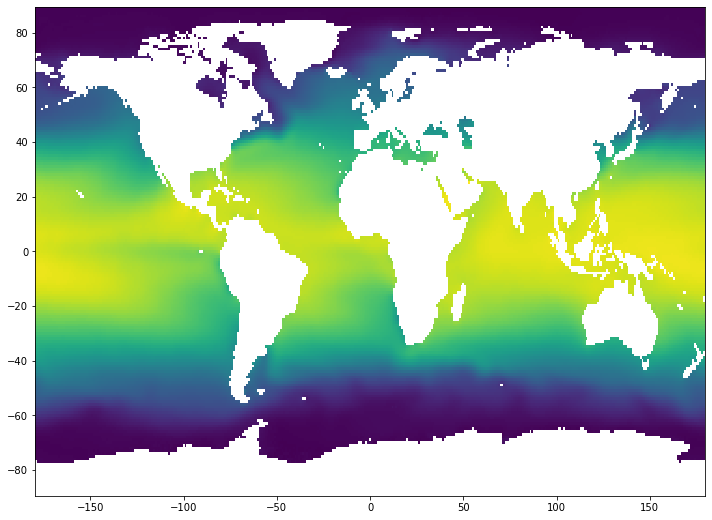

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(lonv,latv,T)
plt.show()

In [ ]:
depth.shape

(102,)

In [ ]:
print(nc.variables.keys())

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


In [ ]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
depth = nc.variables['depth'][:]*-1
temp = nc.variables['t_an'][:]

In [ ]:
latv2, depv = np.meshgrid(lat,depth,indexing='xy')

In [ ]:
depv

masked_array(
  data=[[-0.0e+00, -0.0e+00, -0.0e+00, ..., -0.0e+00, -0.0e+00, -0.0e+00],
        [-5.0e+00, -5.0e+00, -5.0e+00, ..., -5.0e+00, -5.0e+00, -5.0e+00],
        [-1.0e+01, -1.0e+01, -1.0e+01, ..., -1.0e+01, -1.0e+01, -1.0e+01],
        ...,
        [-5.3e+03, -5.3e+03, -5.3e+03, ..., -5.3e+03, -5.3e+03, -5.3e+03],
        [-5.4e+03, -5.4e+03, -5.4e+03, ..., -5.4e+03, -5.4e+03, -5.4e+03],
        [-5.5e+03, -5.5e+03, -5.5e+03, ..., -5.5e+03, -5.5e+03, -5.5e+03]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [ ]:
latv2.shape

(102, 180)

In [ ]:
depv.shape

(102, 180)

In [ ]:
T2 = (temp[0,:,:,0])
T2.shape

(102, 180)

/var/folders/n7/62qt651j12s9ck84frzhrxrw0000gn/T/ipykernel_52953/166849335.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(latv2,depv,T2)


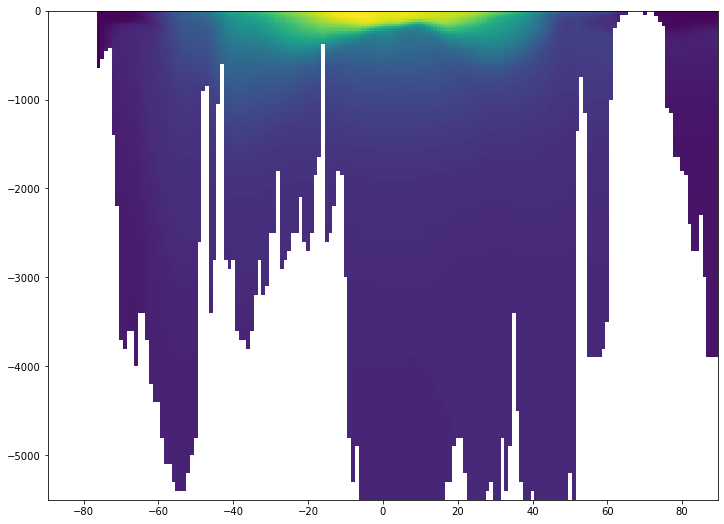

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(latv2,depv,T2)
plt.show()